In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q '/content/drive/My Drive/Datasets/GWA-T-13_Materna-Workload-Traces.zip'

replace GWA-T-13_Materna-Workload-Traces/Materna-Trace-1/00-Trace-Info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
#import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS

In [ ]:
#read the input data file
input_file = pd.read_csv('/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-1/01.csv', delimiter=';')
input_file.head()

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,05.11.2015 00:00:00,2,0,156,"3,4",4194304,1050673,"25,05",0,14,54,12,45
1,05.11.2015 00:05:00,2,0,150,"3,27",4194304,1095552,"26,12",0,17,54,2,13
2,05.11.2015 00:10:00,2,0,158,"3,46",4194304,1025507,"24,45",0,15,54,12,45
3,05.11.2015 00:15:00,2,0,156,"3,4",4194304,992372,"23,66",0,16,54,3,12
4,05.11.2015 00:20:00,2,0,159,"3,47",4194304,1129107,"26,92",0,15,54,13,46


In [ ]:
#number of rows and columns in data
input_file.shape

(8352, 13)

In [ ]:
#Remove timestamp column
input_file = input_file.drop('Timestamp', axis=1)
#replace , with . in percentage value
input_file = input_file.replace(to_replace=r',', value='.', regex=True)
#Take neccessary columns from data
machine_df = input_file[['CPU usage [%]','Memory usage [%]','Disk read throughput [KB/s]',
                        'Disk write throughput [KB/s]']]
#scale the data
machine_data_std = StandardScaler().fit_transform(machine_df)

# Affinity Propogation

In [ ]:
#define funaction for Affinity Propogation clustering
def affinityPropogation(damping, data):
  model = AffinityPropagation(damping)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each clusterfor cluster in clusters:
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    plt.title("Damping="+str(damping))
  # show the plot
  plt.show()

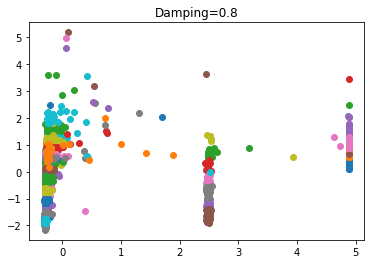

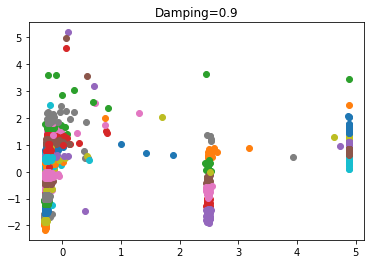

In [ ]:
#call the above defined function
affinityPropogation(damping=0.8, data=machine_data_std)
affinityPropogation(damping=0.9, data=machine_data_std)

# Agglomerative Clustering

In [ ]:
#define funaction for Agglomerative Clustering
def agglomerativeClustering(n_clusters, data):
  # define the model
  model = AgglomerativeClustering(n_clusters=3)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    plt.title("number of clusters = "+str(n_clusters))
  # show the plot
  plt.show()

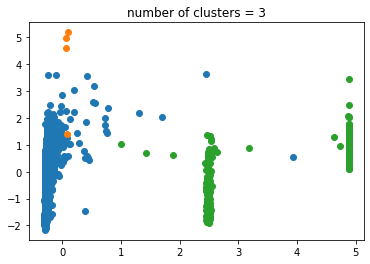

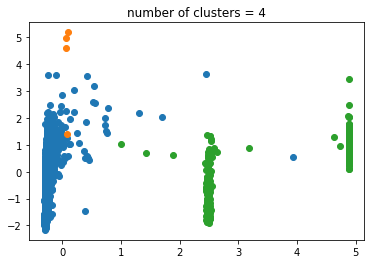

In [ ]:
#call the above defined function
agglomerativeClustering(n_clusters=3, data=machine_data_std)
agglomerativeClustering(n_clusters=4, data=machine_data_std)

# Birch Clustering

In [ ]:
#define funaction for Birch Clustering
def birch(threshold, n_clusters, data):
# define the model
  model = Birch(threshold, n_clusters)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("Thresold="+str(threshold)+"    "+"number of clusters = "+str(n_clusters))
  # show the plot
  plt.show()

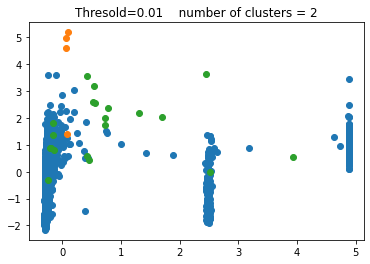

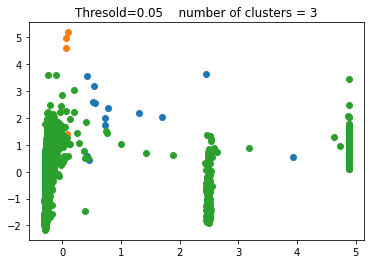

In [ ]:
#call the above defined function
birch(threshold=0.01, n_clusters=2, data=machine_data_std)
birch(threshold=0.05, n_clusters=3, data=machine_data_std)

# KMeans Clustering


In [ ]:
#define funaction for KMeans Clustering
def kMeans(n_clusters, data):
  # define the model
  model = KMeans(n_clusters)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("number of clusters = "+str(n_clusters))
  # show the plot
  plt.show()

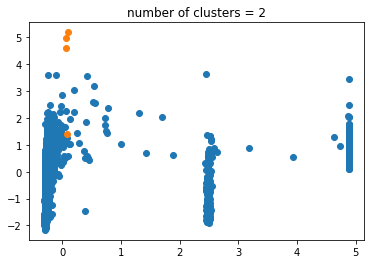

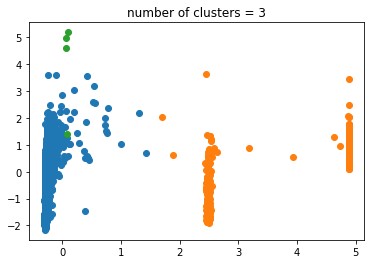

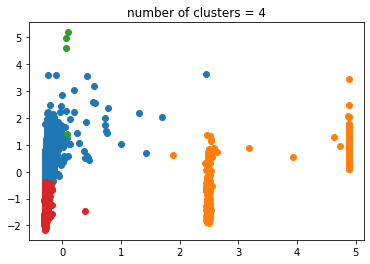

In [ ]:
#call the above defined funaction
kMeans(n_clusters=2, data=machine_data_std)
kMeans(n_clusters=3, data=machine_data_std)
kMeans(n_clusters=4, data=machine_data_std)

# Mini Batch KMeans Clustering

In [ ]:
# define function for mini-batch k-means clustering
def miniBatchKMeansClustering(n_clusters, data):
  # define the model
  model = MiniBatchKMeans(n_clusters)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("number of clusters = "+str(n_clusters))
  # show the plot
  plt.show()

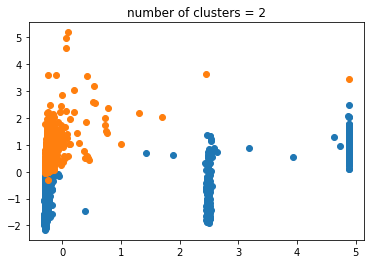

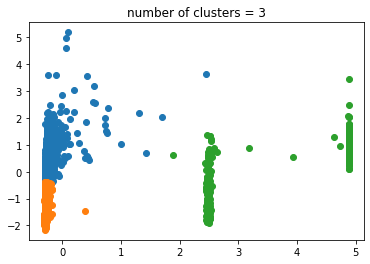

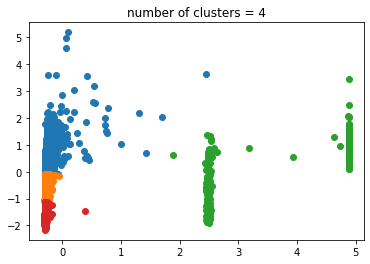

In [ ]:
#call the above defined function
miniBatchKMeansClustering(n_clusters=2, data=machine_data_std)
miniBatchKMeansClustering(n_clusters=3, data=machine_data_std)
miniBatchKMeansClustering(n_clusters=4, data=machine_data_std)

# Mean Shift Clustering

In [ ]:
#define function for MeanShift clustering
def meanShift(data):
  # define the model
  model = MeanShift()
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
  # show the plot
  plt.show()

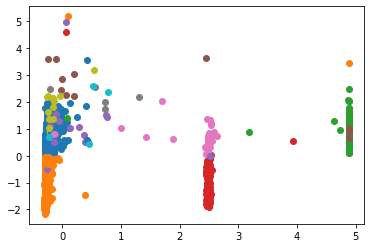

In [ ]:
#call the above defined funnction
meanShift(data=machine_data_std)

# OPTICS Clustering

In [ ]:
#define function for OPTICS clustering
def OPTICSClustering(eps, min_samples, data):
  # define the model
  model = OPTICS(eps, min_samples)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("eps="+str(eps)+"    "+"min_samples = "+str(min_samples))
  # show the plot
  plt.show()

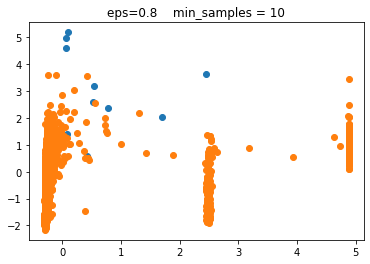

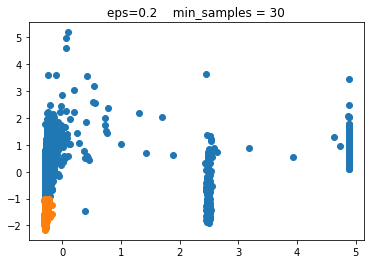

In [ ]:
#call the above defined function
OPTICSClustering(eps=0.8, min_samples=10, data=machine_data_std)
OPTICSClustering(eps=0.2, min_samples=30, data=machine_data_std)

# Gaussian Mixture Clustering

In [ ]:
# define function for gaussian mixture clustering
def gaussianMixtureClustering(n_components, data):
  # define the model
  model = GaussianMixture(n_components)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("Number of components"+str(n_components))
  # show the plot
  plt.show()

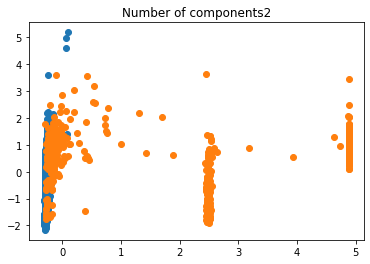

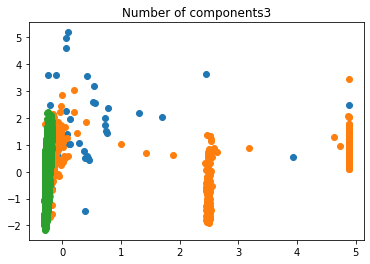

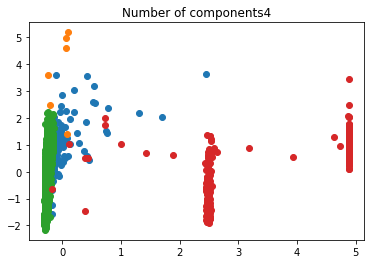

In [ ]:
#call the above defined function
gaussianMixtureClustering(n_components=2, data=machine_data_std)
gaussianMixtureClustering(n_components=3, data=machine_data_std)
gaussianMixtureClustering(n_components=4, data=machine_data_std)

# DBSCAN

In [ ]:
# define function for dbscan clustering
def dbscan(eps, min_samples, data):
  # define the model
  model = DBSCAN(eps, min_samples)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    plt.title("eps="+str(eps)+"    "+"min_samples="+str(min_samples))
  # show the plot
  plt.show()

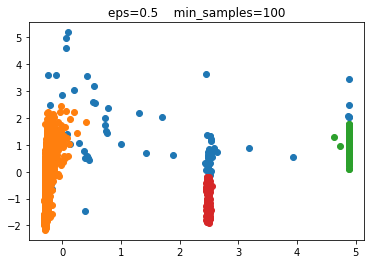

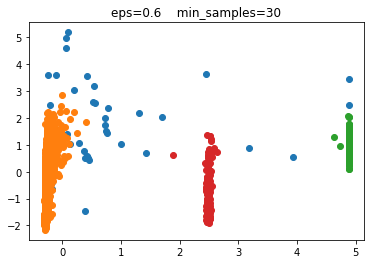

In [ ]:
#call the above defined funtion
dbscan(eps=0.5, min_samples=100, data=machine_data_std)
dbscan(eps=0.6, min_samples=30, data=machine_data_std)